In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [15]:
df_features = pd.read_csv('../data/features/features_interpolated.csv', encoding='latin-1', engine='python')
df_features.drop(columns=['Unnamed: 0'], inplace=True)
immigration = pd.read_csv('../data/labels/OECD_acquisition_data_interpolated.csv', encoding='latin-1', engine='python')
immigration.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
df_features.head()

,Country,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,Unemployment Rate
0,AUS,2000,339446.6,4.887310,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28
1,AUS,2001,345645.0,4.889552,1.071713e+10,3.793582e+11,7.682723,4.407135,52.689266,79.634146,8.37,6.74
2,AUS,2002,353371.3,4.891794,1.465632e+10,3.955808e+11,7.878076,2.981575,55.266950,79.936585,8.74,6.37
3,AUS,2003,352581.1,4.894036,8.985246e+09,4.674980e+11,7.882926,2.732596,57.844633,80.239024,7.15,5.93
4,AUS,2004,365808.0,4.896278,4.290767e+10,6.143264e+11,8.090034,2.343255,60.422317,80.490244,6.68,5.39


In [17]:
immigration.head()

,CO2,COU,Year,Value
0,GBR,BEL,2000,152.0
1,GBR,BEL,2001,274.0
2,GBR,BEL,2002,201.0
3,GBR,BEL,2003,126.0
4,GBR,BEL,2004,128.0


### Normal non linear models with year as feature

In [18]:
# merge two dataset together
df_merged = pd.merge(df_features, immigration, left_on=['Country', 'Year'], right_on=['COU', 'Year'])
df_merged.drop(columns=['COU'], inplace=True)
df_merged.head()

,Country,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,Unemployment Rate,CO2,Value
0,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GBR,14314.0
1,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,BEL,32.0
2,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GRC,256.0
3,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,CHE,181.0
4,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,SVN,18.0


In [19]:
# change countries to one-hot encoding
df_merged = pd.get_dummies(df_merged, columns=['Country'], prefix='Country')
df_merged = pd.get_dummies(df_merged, columns=['CO2'], prefix='CO2')
print(df_merged.columns)
df_merged.head()

Index(['Year', 'Carbon Emissions', 'Education Expenditure',
       'Foreign Direct Investment (FDI) Inflows', 'GDP', 'Health Expenditure',
       'Inflation Rate', 'Internet Penetration', 'Life Expectancy',
       'Renewable Energy Production', 'Unemployment Rate', 'Value',
       'Country_AUS', 'Country_AUT', 'Country_BEL', 'Country_CAN',
       'Country_CHE', 'Country_CHL', 'Country_DEU', 'Country_DNK',
       'Country_ESP', 'Country_FIN', 'Country_FRA', 'Country_GBR',
       'Country_GRC', 'Country_HUN', 'Country_IRL', 'Country_ISL',
       'Country_ITA', 'Country_LUX', 'Country_LVA', 'Country_MEX',
       'Country_NLD', 'Country_NOR', 'Country_NZL', 'Country_POL',
       'Country_SVN', 'Country_SWE', 'Country_USA', 'CO2_AUS', 'CO2_AUT',
       'CO2_BEL', 'CO2_CAN', 'CO2_CHE', 'CO2_CHL', 'CO2_DEU', 'CO2_DNK',
       'CO2_ESP', 'CO2_FIN', 'CO2_FRA', 'CO2_GBR', 'CO2_GRC', 'CO2_HUN',
       'CO2_IRL', 'CO2_ISL', 'CO2_ITA', 'CO2_LUX', 'CO2_LVA', 'CO2_MEX',
       'CO2_NLD', 'CO2_NOR', '

,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,...,CO2_LUX,CO2_LVA,CO2_MEX,CO2_NLD,CO2_NOR,CO2_NZL,CO2_POL,CO2_SVN,CO2_SWE,CO2_USA
0,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
1,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
2,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
3,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
4,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,True,False,False


In [20]:
# X = df_merged.drop(['Value','Country','CO2'], axis=1)  # Features
X = df_merged.drop(['Value'], axis=1)  # Features
print(X.columns)
y = df_merged['Value']  # Target variable

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(X)

# # Define the bins for classification
# bins = [-float('inf'), 0.33, 0.67, float('inf')]
# Perform binning to split the values into classes
# class_labels = pd.cut(y, bins=bins, labels=False, include_lowest=True)

# Perform binning to split the values into classes based on the distribution
class_labels = pd.qcut(y, q=3, labels=False)

X_train, X_test, y_train, y_test = train_test_split(normalized_features, class_labels, test_size=0.2, random_state=42)
print(normalized_features.shape)

Index(['Year', 'Carbon Emissions', 'Education Expenditure',
       'Foreign Direct Investment (FDI) Inflows', 'GDP', 'Health Expenditure',
       'Inflation Rate', 'Internet Penetration', 'Life Expectancy',
       'Renewable Energy Production', 'Unemployment Rate', 'Country_AUS',
       'Country_AUT', 'Country_BEL', 'Country_CAN', 'Country_CHE',
       'Country_CHL', 'Country_DEU', 'Country_DNK', 'Country_ESP',
       'Country_FIN', 'Country_FRA', 'Country_GBR', 'Country_GRC',
       'Country_HUN', 'Country_IRL', 'Country_ISL', 'Country_ITA',
       'Country_LUX', 'Country_LVA', 'Country_MEX', 'Country_NLD',
       'Country_NOR', 'Country_NZL', 'Country_POL', 'Country_SVN',
       'Country_SWE', 'Country_USA', 'CO2_AUS', 'CO2_AUT', 'CO2_BEL',
       'CO2_CAN', 'CO2_CHE', 'CO2_CHL', 'CO2_DEU', 'CO2_DNK', 'CO2_ESP',
       'CO2_FIN', 'CO2_FRA', 'CO2_GBR', 'CO2_GRC', 'CO2_HUN', 'CO2_IRL',
       'CO2_ISL', 'CO2_ITA', 'CO2_LUX', 'CO2_LVA', 'CO2_MEX', 'CO2_NLD',
       'CO2_NOR', 'CO2_NZL',

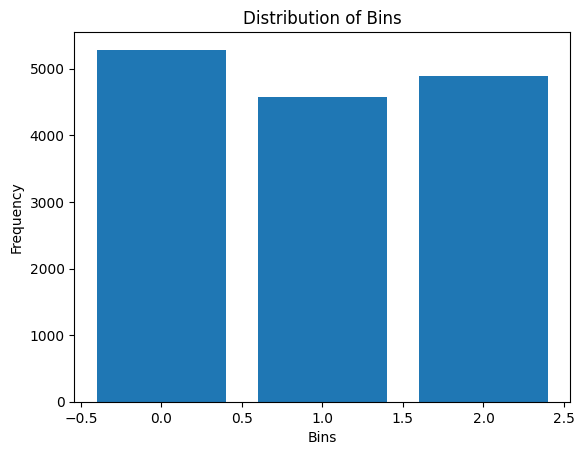

In [35]:
# Compute the bin frequencies
bin_counts = np.bincount(class_labels)

# Plot the bar plot of the bin frequencies
plt.bar(range(len(bin_counts)), bin_counts)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Bins')
plt.show()

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate evaluation metrics
classification_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1046
           1       0.78      0.74      0.76       920
           2       0.92      0.93      0.92       983

    accuracy                           0.85      2949
   macro avg       0.85      0.85      0.85      2949
weighted avg       0.85      0.85      0.85      2949



### Timeseries forecasting with years as time steps (SARIMAX model)

In [23]:
# merge two dataset together
df_merged = pd.merge(df_features, immigration, left_on=['Country', 'Year'], right_on=['COU', 'Year'])
df_merged.drop(columns=['COU'], inplace=True)
df_merged.head()

,Country,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,Unemployment Rate,CO2,Value
0,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GBR,14314.0
1,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,BEL,32.0
2,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GRC,256.0
3,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,CHE,181.0
4,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,SVN,18.0


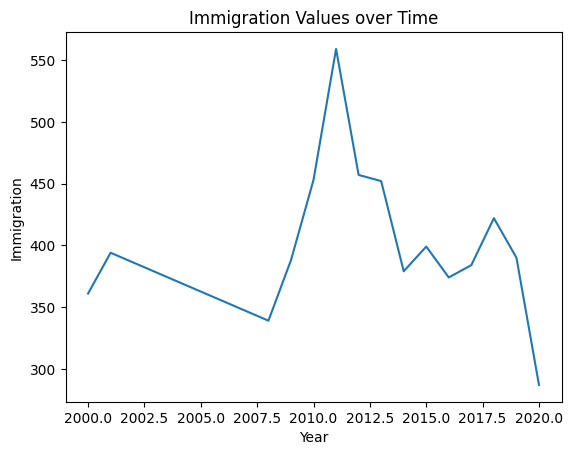

In [24]:
country1 = "FRA"
country2 = "BEL"

plt.plot(df_merged['Year'].loc[(df_merged["Country"]==country1)&(df_merged["CO2"]==country2)], df_merged['Value'].loc[(df_merged["Country"]==country1)&(df_merged["CO2"]==country2)])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.title('Immigration Values over Time')

# Displaying the plot
plt.show()

In [25]:
# change countries to one-hot encoding
df_merged = pd.get_dummies(df_merged, columns=['Country'], prefix='Country')
df_merged = pd.get_dummies(df_merged, columns=['CO2'], prefix='CO2')
print(df_merged.columns)
df_merged.head()

Index(['Year', 'Carbon Emissions', 'Education Expenditure',
       'Foreign Direct Investment (FDI) Inflows', 'GDP', 'Health Expenditure',
       'Inflation Rate', 'Internet Penetration', 'Life Expectancy',
       'Renewable Energy Production', 'Unemployment Rate', 'Value',
       'Country_AUS', 'Country_AUT', 'Country_BEL', 'Country_CAN',
       'Country_CHE', 'Country_CHL', 'Country_DEU', 'Country_DNK',
       'Country_ESP', 'Country_FIN', 'Country_FRA', 'Country_GBR',
       'Country_GRC', 'Country_HUN', 'Country_IRL', 'Country_ISL',
       'Country_ITA', 'Country_LUX', 'Country_LVA', 'Country_MEX',
       'Country_NLD', 'Country_NOR', 'Country_NZL', 'Country_POL',
       'Country_SVN', 'Country_SWE', 'Country_USA', 'CO2_AUS', 'CO2_AUT',
       'CO2_BEL', 'CO2_CAN', 'CO2_CHE', 'CO2_CHL', 'CO2_DEU', 'CO2_DNK',
       'CO2_ESP', 'CO2_FIN', 'CO2_FRA', 'CO2_GBR', 'CO2_GRC', 'CO2_HUN',
       'CO2_IRL', 'CO2_ISL', 'CO2_ITA', 'CO2_LUX', 'CO2_LVA', 'CO2_MEX',
       'CO2_NLD', 'CO2_NOR', '

,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,...,CO2_LUX,CO2_LVA,CO2_MEX,CO2_NLD,CO2_NOR,CO2_NZL,CO2_POL,CO2_SVN,CO2_SWE,CO2_USA
0,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
1,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
2,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
3,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
4,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,True,False,False


In [26]:
# X = df_merged.drop(['Year','Value','Country','CO2'], axis=1)  # Features
X = df_merged.drop(['Year','Value'], axis=1)  # Features
print(X.columns)
y = df_merged['Value']  # Target variable

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(X)

# # Define the bins for classification
# bins = [-float('inf'), 0.33, 0.67, float('inf')]
# Perform binning to split the values into classes
# class_labels = pd.cut(y, bins=bins, labels=False, include_lowest=True)

# Perform binning to split the values into classes based on the distribution
class_labels = pd.qcut(y, q=3, labels=False)

Index(['Carbon Emissions', 'Education Expenditure',
       'Foreign Direct Investment (FDI) Inflows', 'GDP', 'Health Expenditure',
       'Inflation Rate', 'Internet Penetration', 'Life Expectancy',
       'Renewable Energy Production', 'Unemployment Rate', 'Country_AUS',
       'Country_AUT', 'Country_BEL', 'Country_CAN', 'Country_CHE',
       'Country_CHL', 'Country_DEU', 'Country_DNK', 'Country_ESP',
       'Country_FIN', 'Country_FRA', 'Country_GBR', 'Country_GRC',
       'Country_HUN', 'Country_IRL', 'Country_ISL', 'Country_ITA',
       'Country_LUX', 'Country_LVA', 'Country_MEX', 'Country_NLD',
       'Country_NOR', 'Country_NZL', 'Country_POL', 'Country_SVN',
       'Country_SWE', 'Country_USA', 'CO2_AUS', 'CO2_AUT', 'CO2_BEL',
       'CO2_CAN', 'CO2_CHE', 'CO2_CHL', 'CO2_DEU', 'CO2_DNK', 'CO2_ESP',
       'CO2_FIN', 'CO2_FRA', 'CO2_GBR', 'CO2_GRC', 'CO2_HUN', 'CO2_IRL',
       'CO2_ISL', 'CO2_ITA', 'CO2_LUX', 'CO2_LVA', 'CO2_MEX', 'CO2_NLD',
       'CO2_NOR', 'CO2_NZL', 'CO2_PO

In [27]:
# Train-Test Split
train_size = int(len(df_merged) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = class_labels[:train_size], class_labels[train_size:]
exog_train, exog_test = normalized_features[:train_size], normalized_features[train_size:]

In [28]:
order = (1, 0, 0)  # Set the order of the non-seasonal part of the model
seasonal_order = (1, 0, 0, 12)  # Set the order of the seasonal part of the model
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order, exog=exog_train)
fitted_model = model.fit()

c:\Users\marti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
predictions = fitted_model.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)

In [30]:
# Calculate evaluation metrics
classification_metrics = classification_report(test_data, list(round(predictions)))
print("Classification Report:\n", classification_metrics)

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.43      0.53      0.48       970
         1.0       0.34      0.75      0.47       801
         2.0       0.92      0.02      0.04      1178

    accuracy                           0.38      2949
   macro avg       0.43      0.32      0.25      2949
weighted avg       0.60      0.38      0.30      2949



c:\Users\marti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
